In [107]:
import matplotlib.pyplot as plt
import numpy as np
def freq_resp(b = [1], a = [1]):
    
    # Calculate the frequency response
    w, h = sig.freqz(b, a)

    # Plot the magnitude and phase response
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(w/np.pi, 20 * np.log10(abs(h)))
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Magnitude (dB)')
    plt.title('Magnitude Response')

    plt.subplot(2, 1, 2)
    plt.plot(w, np.angle(h, deg=True))
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Phase (degrees)')
    plt.title('Phase Response')

    plt.tight_layout()
    plt.show()

In [108]:
import numpy as np
def LMS(d, x, L, mu, N):
    y = np.zeros_like(d)
    e = np.zeros_like(d)
    bhat = np.zeros([L+1, 1]) #Lx1
    for n in range(L,N):
        xv = np.flip(x[n-L:n+1]) #Lx1
        y = np.dot(xv, bhat)
        e[n] = d[n]-y
        bhat = bhat + 2*mu*e[n]*xv

    freq_resp(bhat.reshape(L+1,1), [1])
    plt.plot(10*np.log10(e*e+.0000001))
    plt.ylabel('MSE (dB)')
    plt.xlabel('Iteration')
    string = 'Mu = ' + str(mu)
    plt.title(string)
    plt.show()
    return bhat

# Create the desired signal

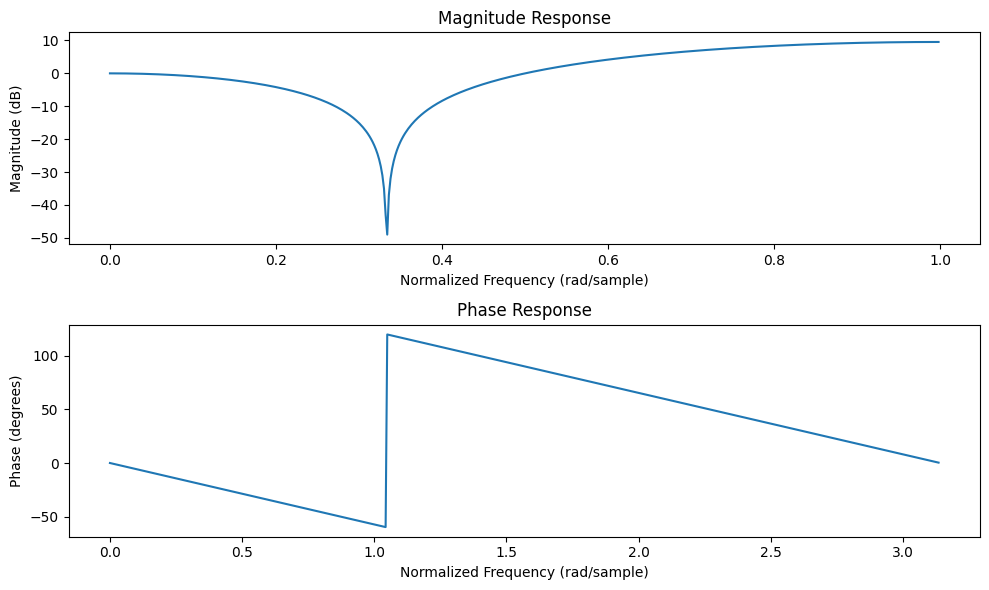

In [227]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

b = [1, -1, 1]
a = [1]
N_points  = 1000 #number of iterations 
x = np.random.normal(0, 1, N_points)#
d = sig.filtfilt(b=b, a=a, x=x)
x = x.reshape([N_points,1])
d = d.reshape([N_points,1])
freq_resp(b, a)

In [211]:

#LMS(d=d, x=x, L=5, mu=.1, N=N_points)


bhat = 
 [[1.05744067]
 [0.18091372]
 [1.58641891]]


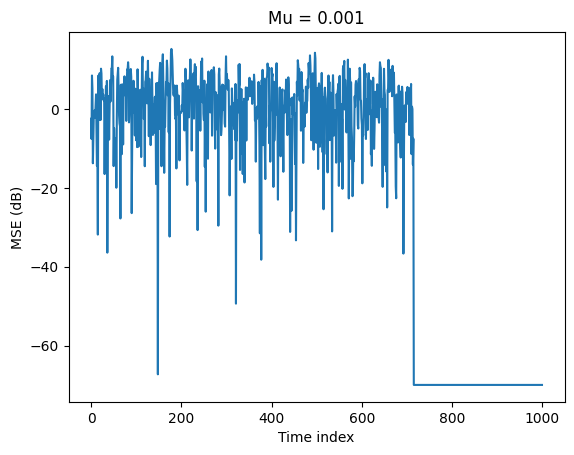

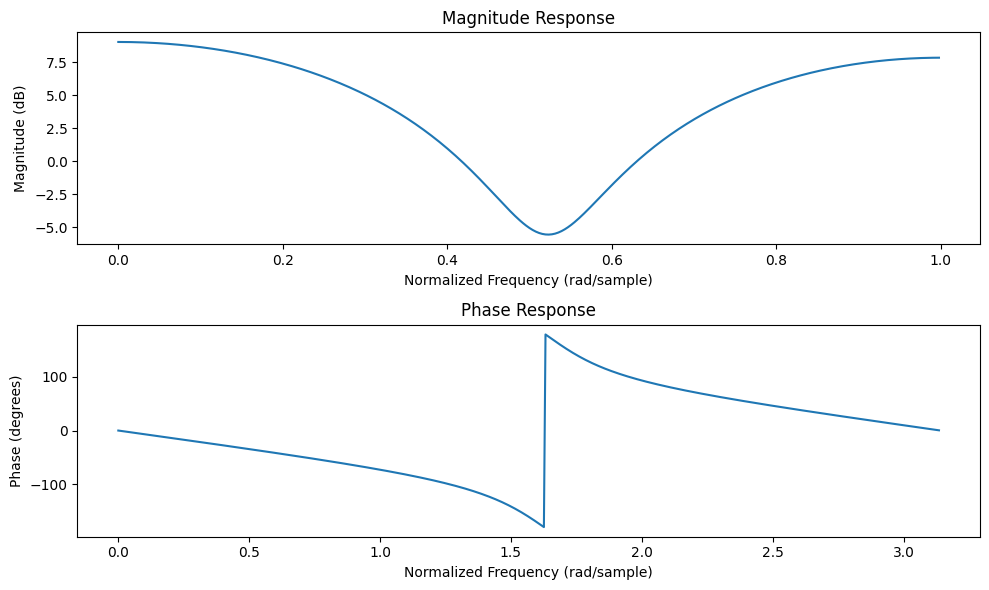

In [229]:
mu = .001
y = np.zeros_like(d)
e = np.zeros_like(d)
Nb = 5 #block size
L= 2 #filter order
coef = L+1 #num of coefficients
bhat = np.ones([coef, 1])
s = Nb  #S is 
#num_of_blks = round((N_points - (Nb-L))/s + 1) #might actually be less

for i in range(round(N_points/(Nb+L))):
    xlist = [] #using this to dynamically create NbxL+1 matrix

    #creating the NbxL matrix
    for j in range(Nb): 
        #create the first vector
        location = i*s+j #block index*shift + vector iteration
        xb = np.flip(x[location : location+coef]) #

        xlist.append(xb)
        #break   
    xb = np.array(xlist).reshape(Nb, coef) #NbxL+1
    
    yb = np.dot(xb, bhat)
    db = d[i*s : i*s+Nb]
    eb = db - yb # Nbx1 - Nbx1, create a variable to be able to see the size of matrix
    e[i*s : i*s+Nb] = eb 
    
    grad =  (2/Nb) * mu * np.dot(xb.T, eb) #calculate the gradient, (NbxL+1)T @ L+1x1
    bhat = bhat + grad #(2/Nb)*mu*xb.T@eb
    if i == 0:
        #break
        print()
    if abs((bhat - np.array(b))).all() < .1 :
        print('Converged!')
        break
print("bhat = \n", bhat)

plt.plot(10*np.log10((1/Nb)*e*e+.0000001))
plt.ylabel('MSE (dB)')
plt.xlabel('Time index')
string = 'Mu = ' + str(mu)
plt.title(string)
plt.show()
freq_resp(bhat, [1])


